<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/EJERCICIO_SYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

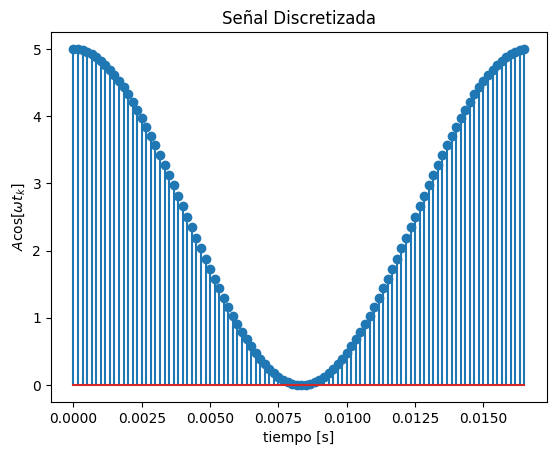

In [54]:
#EJERCICIO punto 1
import numpy as np
import matplotlib.pyplot as plt

F = 60 #Frecuencia
T_o = 1/60 #Periodo funcion coseno
Fs= 100*F #Frecuencia de muestreo
Ts= 1/Fs #Tiempo de muestreo
A = 120 # amplitud
ti = 0 #tiempo inicial
tf = T_o #tiempo final
tv = np.arange(ti,tf,Ts) #vector de datos en tiempo
xv = A * np.cos(2*np.pi*tv/T_o) #vector de amplitud

y_min =0
y_max =5

def b(x,ymin =0, ymax = 5):
  xmax = max(x)
  xmin = min(x)
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c #pendiente
  return yv

yv = b(xv,ymin=0,ymax=5) #funcion de ymin y ymax definidos por nosotros

plt.stem(tv,yv) #función para imprimir la señal discretizada
plt.xlabel('tiempo [s]')
plt.ylabel('$A\cos[\omega t_k]$')
plt.title('Señal Discretizada')
plt.show()

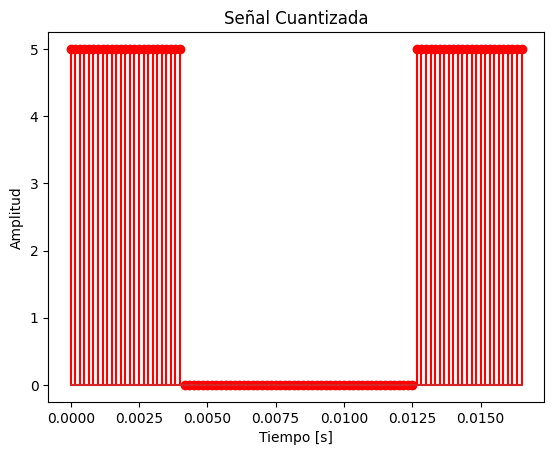

In [55]:
from scipy.spatial.distance import cdist

def cuantizar(xv,nbits):
  nbits=3 #definición de la cantidad de bits requeridos
  ymin=0
  ymax=5
  ve=np.linspace(ymin,ymax,2**nbits) #vector de cuantización
  xv.reshape(-1,1)
  xv
  ve.reshape(-1,1) #vectores de las funciones a utilizar
  ve
  d=cdist(xv.reshape(-1,1),ve.reshape(-1,1)) #genera una matriz con los dos vectores anteriores
  d.shape
  ind=np.argmin(d,axis=1) #busca la posición de los elementos más pequeños en cada fila
  señal_cuantizada= ve[ind]
  return señal_cuantizada


señal_cuantizada= np.zeros_like(xv) #señal cuantizada inicializada en un vector de ceros

for i in range (len(xv)):
  señal_cuantizada[i]= cuantizar(xv[i],nbits)  #Cuantizar cada muestra de la señal original

plt.stem(tv, señal_cuantizada,'r.')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal Cuantizada')
plt.show()

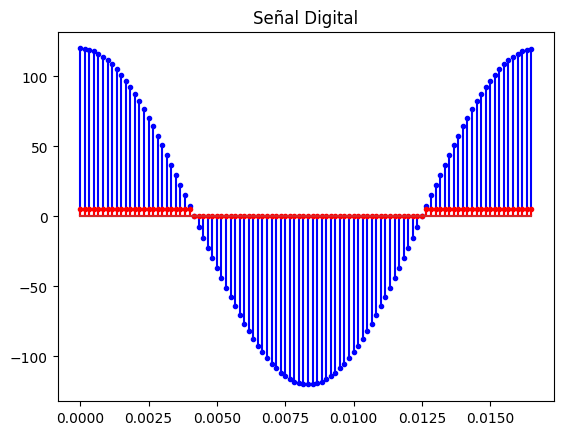

In [58]:
plt.stem(tv, xv, linefmt='b.', markerfmt='b.', label='Señal Discretizada')
plt.stem(tv, señal_cuantizada, linefmt='r.', markerfmt='r.', label='Señal Cuantizada')
plt.title('Señal Digital')
plt.show()
